# Graph - NetworkX

- **Created by Andrés Segura Tinoco**
- **Created on Nov 27, 2019**

In [1]:
# Load the Python libraries
import networkx as nx

In [2]:
# Load Plotting libraries
import matplotlib.pyplot as plt

In [3]:
print('Networkx version:', nx.__version__)

Networkx version: 2.3


## 1. Simple Graph (SG)

In [4]:
# Create an empty Simple Graph (SG)
sg = nx.Graph()

In [5]:
# Add nodes
nodes_list = ["1", "2", "3", "4", "5"]
sg.add_nodes_from(nodes_list)
print(sg.nodes())

['1', '2', '3', '4', '5']


In [6]:
# Add edges
sg.add_edges_from([("1","2"), ("1","3"), ("1","4"), ("1","5"), ("3","2"), ("4","2"), ("4","3"), ("5","4")])
print(sg.edges())

[('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('3', '4'), ('4', '5')]


In [7]:
# Get neighbors of node "1"
list(sg.neighbors("1"))

['2', '3', '4', '5']

In [8]:
# Get nodes positions
pos = nx.layout.spring_layout(sg)
pos

{'1': array([-0.10551976,  0.40955792]),
 '2': array([-0.89504721, -0.14399428]),
 '3': array([-0.36473103, -0.82994138]),
 '4': array([ 0.365298 , -0.2080495]),
 '5': array([1.        , 0.77242724])}

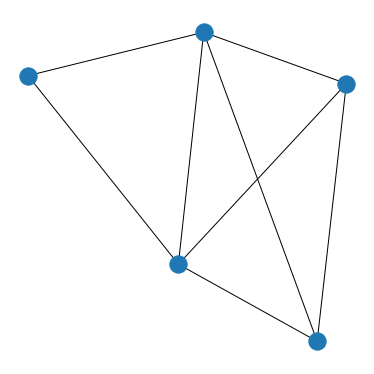

In [9]:
# Plot Simple Graph (free format)
plt.rcParams["figure.figsize"] = [5, 5]
nx.draw(sg)
plt.show()

 ## 2. Directed Weighted Graph (DWG)

In [10]:
# Create an empty Directed Weighted Graph (DWG)
dwg = nx.DiGraph()

In [11]:
# Add nodes
nodes_list = ["1", "2", "3", "4", "5"]
dwg.add_nodes_from(nodes_list)

In [12]:
# Add weighted edges
edges = [("1","2",50), ("1","3",30), ("1","4",100), ("1","5",10), ("3","2",5), ("4","2",20), ("4","3",50), ("5","4",10)]
dwg.add_weighted_edges_from(edges)

In [13]:
# We then set the coordinates of each node
dwg.node['1']['pos'] = (0, 0)
dwg.node['2']['pos'] = (2, 2)
dwg.node['3']['pos'] = (2,-2)
dwg.node['4']['pos'] = (5, 2)
dwg.node['5']['pos'] = (5,-2)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(dwg, 'pos')

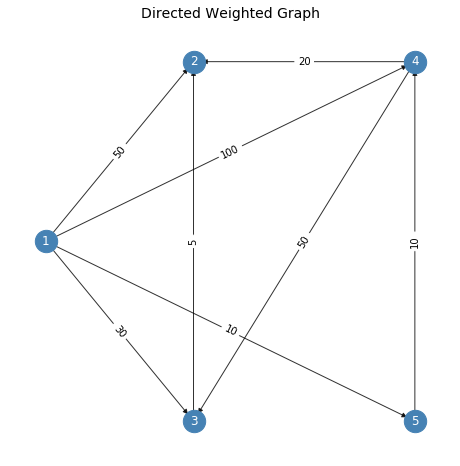

In [14]:
# Nodes labels
labels = {}
for n in dwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for s, t, w in edges:
    weights[(s, t)] = w

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 8]
nx.draw_networkx_nodes(dwg, pos, nodelist=dwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(dwg, pos, edgelist=dwg.edges(), width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_labels(dwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(dwg, pos, edge_labels=weights, font_color='black')
plt.title('Directed Weighted Graph', fontsize=14)
plt.axis('off')
plt.show()

 ### Shortest Path

In [15]:
# Using Dijkstra algorithm
sp = nx.dijkstra_path(dwg, source = '5', target = '2')
sp

['5', '4', '2']

## 3. Dijkstra algorithm

---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>